## 1.0 Prerequisites on libraries

In [1]:
## Library import
import os

## Libraries for basic data-processing & visualization
import numpy as np
import pandas as pd
!pip install -U seaborn
import seaborn as sns

## Libraries for decision-tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import graphviz
from sklearn.externals.six import StringIO
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'
try:
    import pydotplus
except:
    !pip install pydotplus
    import pydotplus
    
## Libraries for logistic-regression
from sklearn.linear_model import LogisticRegression

## Library for evaluation on classification
from sklearn.metrics import confusion_matrix, f1_score

## Libraries for Keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

## Random seed for reproductivity, especially for Keras
from numpy.random import seed
seed(0)
from tensorflow import set_random_seed
set_random_seed(0)

import matplotlib.pyplot as plt

%matplotlib inline

Requirement already up-to-date: seaborn in c:\users\kyiwasak.fareast\appdata\local\continuum\anaconda3\envs\dl\lib\site-packages (0.9.0)


Using TensorFlow backend.


In [2]:
WKDIR = '../data/'
os.chdir(WKDIR)

## 2.0 Load data & its definition

In this chapter, we load raw data from csv-format data. Original data is [this site](https://www.kaggle.com/johndddddd/customer-satisfaction).

Also, we review the basic functions on pandas & numpy in comparing SQL syntax. Please note in advance that they don't cover all functions.

In [3]:
## Data import
SATISFACTION_FILE = 'satisfaction.csv'
df = pd.read_csv(SATISFACTION_FILE)

In [4]:
## Size of DataFrame (row numbers, column numbers)
df.shape

(129880, 24)

In [5]:
## Confirm data columns
df.columns

Index(['id', 'satisfaction_v2', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

### Definition of each column


|Column|Description|Data examples|
|-----|:-----:|:-----|
|satisfaction_v2|Airline satisfaction level|Satisfaction, neutral or dissatisfaction|
|Gender|Gender of the passengers |Female, Male|
|Customer Type|The customer type|Loyal customer, disloyal customer|
|Age|The actual age of the passengers||
|Type of Travel|Purpose of the flight of the passengers|Personal Travel, Business Travel|
|Class|Travel class in the plane of the passengers|Business, Eco, Eco Plus|
|Flight Distance|The flight distance of this journey||
|Seat comfort|Satisfaction level of Seat comfort||
|Departure/Arrival time convenient|Satisfaction level of Departure/Arrival time convenient||
|Food and drink|Satisfaction level of Food and drink||
|Gate location|Satisfaction level of Gate location||
|Inflight wifi service|Satisfaction level of the inflight wifi service|0:Not Applicable;1-5|
|Inflight entertainment|Satisfaction level of inflight entertainment||
|Online support|??||
|Ease of Online booking|Satisfaction level of online booking||
|On-board service|Satisfaction level of On-board service||
|Leg room service|Satisfaction level of Leg room service||
|Baggage handling|Satisfaction level of baggage handling||
|Checkin service|Satisfaction level of Check-in service||
|Cleanliness|Satisfaction level of Cleanliness||
|Online boarding|Satisfaction level of online boarding||
|Departure Delay in Minutes|Minutes delayed when departure||
|Arrival Delay in Minutes|Minutes delayed when Arrival|



Ref. https://www.kaggle.com/johndddddd/customer-satisfaction/home

### 2.0.1 Projection

If SQL, ...
```SQL
SELECT
    TOP(10) [Flight Distance]
FROM
    TABLE_SATISFACTION
```

In [6]:
df['Flight Distance'].head(10)

0     265
1    2464
2    2138
3     623
4     354
5    1894
6     227
7    1812
8      73
9    1556
Name: Flight Distance, dtype: int64

### 2.0.2 Projection with plural columns
If SQL, ...
```SQL
SELECT
    TOP(5) [Flight Distance], [Type of Travel]
FROM
    TABLE_SATISFACTION
```

In [7]:
df[['Flight Distance', 'Type of Travel']].head()

,Flight Distance,Type of Travel
0,265,Personal Travel
1,2464,Personal Travel
2,2138,Personal Travel
3,623,Personal Travel
4,354,Personal Travel


### 2.0.3 Select distinct

If SQL, ...

```SQL
SELECT
    DISTINCT [Flight Distance]
FROM
    TABLE_SATISFACTION
```

In [8]:
df['Flight Distance'].unique()

array([ 265, 2464, 2138, ..., 5832, 5120, 4260], dtype=int64)

### 2.0.4 filter

If SQL, ...

```SQL
SELECT
    TOP(10) *
FROM
    TABLE_SATISFACTION
WHERE
    Gender = 'Female'
```

In [9]:
df.query("Gender == 'Female'").head(10)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
6,32838,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,...,5,5,5,0,5,5,5,3,17,15.0
8,53786,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,...,5,4,4,0,1,5,4,4,0,0.0
10,89429,satisfied,Female,Loyal Customer,58,Personal Travel,Eco,104,0,0,...,3,3,3,0,1,2,3,5,47,48.0
11,126744,satisfied,Female,Loyal Customer,34,Personal Travel,Eco,3633,0,0,...,2,2,3,2,5,2,5,2,0,0.0
14,32848,satisfied,Female,Loyal Customer,47,Personal Travel,Eco,84,0,1,...,1,5,5,0,5,2,5,2,40,48.0
16,129341,satisfied,Female,Loyal Customer,13,Personal Travel,Eco,3693,0,1,...,4,4,4,4,1,3,1,4,5,0.0


### 2.0.5 order by

If SQL, ...
```SQL
SELECT
    *
FROM
    TABLE_SATISFACTION
ORDER BY
    [Flight Distance]
```

In [10]:
df.sort_values('Flight Distance').head(10)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
102381,49026,satisfied,Male,Loyal Customer,43,Business travel,Business,50,2,2,...,2,4,4,4,4,4,4,5,0,0.0
109539,41990,satisfied,Female,Loyal Customer,58,Business travel,Business,50,3,3,...,3,4,4,4,5,4,4,4,0,0.0
12848,51062,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,50,1,1,...,4,4,3,3,4,3,5,4,0,0.0
11913,41932,satisfied,Female,Loyal Customer,59,Personal Travel,Eco,50,4,5,...,4,4,4,4,5,5,4,4,0,3.0
1652,33302,satisfied,Female,Loyal Customer,55,Personal Travel,Eco Plus,50,4,4,...,5,5,3,4,3,4,4,5,0,0.0
66546,49963,neutral or dissatisfied,Female,Loyal Customer,65,Business travel,Eco,50,1,2,...,3,1,1,1,1,3,1,3,2,6.0
89175,123158,satisfied,Female,Loyal Customer,57,Business travel,Business,50,2,2,...,5,4,4,4,3,3,4,2,0,0.0
35548,50847,neutral or dissatisfied,Female,Loyal Customer,60,Personal Travel,Eco,50,4,4,...,5,3,3,4,3,5,3,3,0,0.0
16197,50873,satisfied,Female,Loyal Customer,63,Personal Travel,Eco,50,4,3,...,4,4,4,4,4,3,4,2,0,0.0
859,122110,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,50,0,2,...,5,5,3,1,3,2,4,5,0,0.0


### 2.0.6 group by & aggregate function

If SQL, ...
```SQL
SELECT
    AVG([Flight Distance])
    ,[Type of Travel]
FROM
    TABLE_SATISFACTION
GROUP BY
    [Type of Travel]
```

In [11]:
df[['Flight Distance', 'Type of Travel']].groupby('Type of Travel').mean()

,Flight Distance
Type of Travel,
Business travel,2065.809628
Personal Travel,1793.036181


### 2.0.7 Case statement

If SQL, ...
```SQL
SELECT
    CASE [satisfaction_v2]
        WHEN 'satisfied' THEN 1
        ELSE 0
    END AS [target]
FROM
    TABLE_SATISFACTION
```

In [12]:
df['target'] = df['satisfaction_v2'].apply(lambda x: 1 if x == 'satisfied' else 0)

### 2.0.8 group by & count

If SQL, ...
```SQL
SELECT
    COUNT(1)
    ,[Type of Travel]
FROM
    TABLE_SATISFACTION
GROUP BY
    [Type of Travel]
```

In [13]:
df['Type of Travel'].value_counts()

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

### 2.0.9 Populate dummy variables

If SQL, ...
```SQL
SELECT
    CASE [Type of Travel]
        WHEN 'Business trave' THEN 1
        ELSE 0
    END AS [Business trave]
    ,CASE [Type of Travel]
        WHEN 'Personal Travel' THEN 1
        ELSE 0
    END AS [Personal Travel]
FROM
    TABLE_SATISFACTION
```

In [14]:
pd.get_dummies(df['Type of Travel']).head()

,Business travel,Personal Travel
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


### 2.0.10 pivot table

In [15]:
pd.pivot_table(df, values=['Flight Distance', 'Seat comfort', 'Online boarding'], index='Type of Travel', aggfunc='mean')

,Flight Distance,Online boarding,Seat comfort
Type of Travel,,,
Business travel,2065.809628,3.360730,2.822896
Personal Travel,1793.036181,3.334412,2.873641


## 2.1 Slice on dataframe

In [16]:
## Extract first 10 rows
## Attention!! index of python starts from 0.
df[:10]

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,3,3,0,3,5,3,2,0,0.0,1
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,3,4,4,4,2,3,2,310,305.0,1
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,3,3,4,4,4,2,0,0.0,1
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,1,1,0,1,4,1,3,0,0.0,1
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,2,2,0,2,4,2,5,0,0.0,1
5,100744,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,...,2,5,4,5,5,4,2,0,0.0,1
6,32838,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,...,5,5,0,5,5,5,3,17,15.0,1
7,32864,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,...,2,3,3,4,5,4,2,0,0.0,1
8,53786,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,...,4,4,0,1,5,4,4,0,0.0,1
9,7243,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,...,2,2,4,5,3,4,2,30,26.0,1


In [17]:
## Extract 15th row to 20th row
df[15:20]

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
15,32923,satisfied,Male,Loyal Customer,60,Personal Travel,Eco,1373,0,1,...,1,3,4,1,4,2,1,0,0.0,1
16,129341,satisfied,Female,Loyal Customer,13,Personal Travel,Eco,3693,0,1,...,4,4,4,1,3,1,4,5,0.0,1
17,129306,satisfied,Female,Loyal Customer,52,Personal Travel,Business,2610,0,1,...,1,1,0,1,2,1,3,0,0.0,1
18,55441,satisfied,Female,Loyal Customer,55,Personal Travel,Eco,2554,0,1,...,2,1,1,2,1,3,1,0,0.0,1
19,99352,satisfied,Female,Loyal Customer,28,Personal Travel,Eco,3095,0,1,...,3,2,5,2,3,2,3,0,0.0,1


In [18]:
## Use iloc, If we focus on specific columns
df.iloc[15:20, [4]]

,Age
15,60
16,13
17,52
18,55
19,28


In [19]:
## Or, slice after projection by pandas
df['Age'][15:20]

15    60
16    13
17    52
18    55
19    28
Name: Age, dtype: int64

In [20]:
## The above 2 objects are different, though...
print(type(df.iloc[15:20, [4]]))
print(type(df['Age'][15:20]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


## 2.2 Basic summary

### 2.2.1 Basic statistics for each column

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.00,1925.0,2544.00,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.00,3.0,4.00,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.00,3.0,4.00,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.00,4.0,4.00,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.00,4.0,5.00,5.0


### 2.2.2 Check 'NA'(Not Applicable) value for each column

In [22]:
df.isnull().apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(np.int).T

,False,True
id,129880,0
satisfaction_v2,129880,0
Gender,129880,0
Customer Type,129880,0
Age,129880,0
Type of Travel,129880,0
Class,129880,0
Flight Distance,129880,0
Seat comfort,129880,0
Departure/Arrival time convenient,129880,0


## 2.3 Viaualize & understanding data

### 2.3.1 Check distribution on single colum

c:\users\kyiwasak.fareast\appdata\local\continuum\anaconda3\envs\dl\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


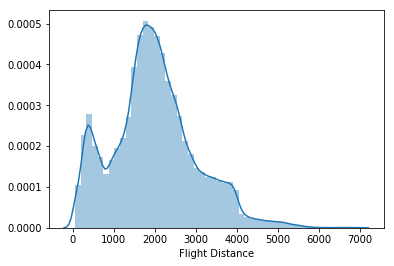

In [23]:
## Visualize Flight distance
sns.distplot(df['Flight Distance'], kde=True)

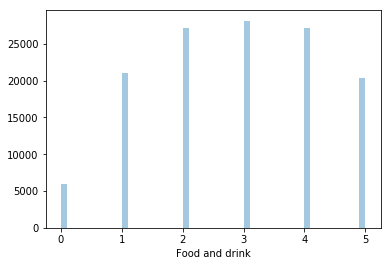

In [24]:
## To-Do: Put another column name on argument of the dataframe 
col_single = 'Food and drink'
sns.distplot(df[col_single], kde=False)

### 2.3.2 Understand relation of several columns

In [25]:
## Calculate correlational coefficient
np.corrcoef(df['Seat comfort'], df['Food and drink'])[1,0]

0.7159971305521255

In [26]:
## To-Do: ut other columns on argument of calculating
col1_corr = 'Inflight wifi service'
col2_corr = 'Inflight entertainment'

np.corrcoef(df[col1_corr], df[col2_corr])[1,0]

0.25382250918562715

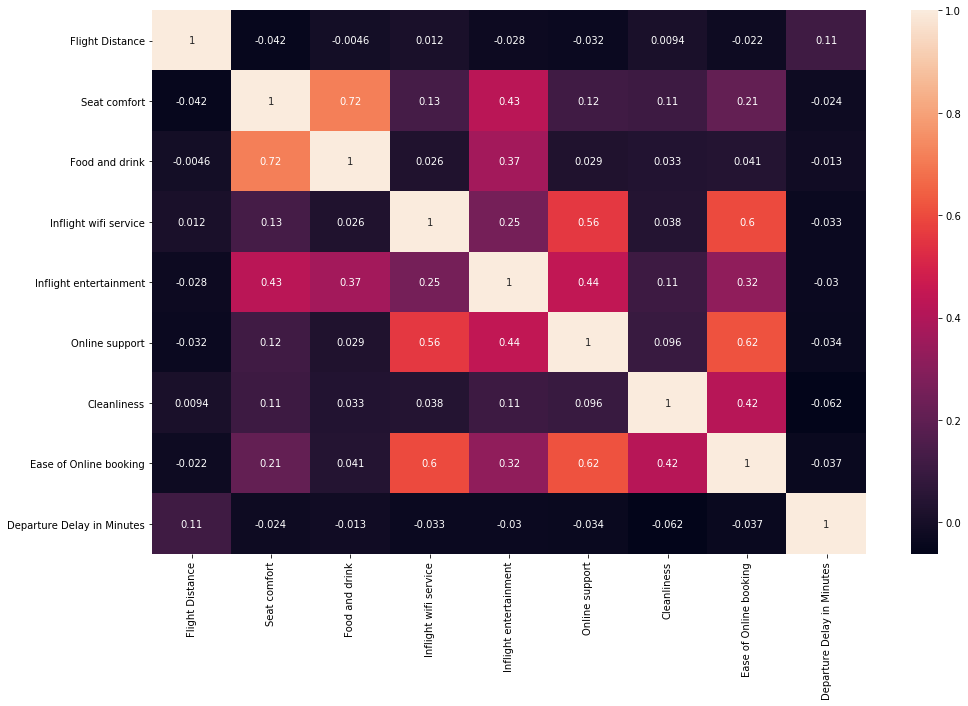

In [27]:
## Correlation matrix for some variables

col_corr = ['Flight Distance'
            ,'Seat comfort'
            ,'Food and drink'
            ,'Inflight wifi service'
            ,'Inflight entertainment'
            ,'Online support'
            ,'Cleanliness'
            ,'Ease of Online booking'
            ,'Departure Delay in Minutes']

plt.figure(figsize=(16,10))
sns.heatmap(df[col_corr].corr(), annot=True)

### 2.3.3 Scatter plot on 2 variables

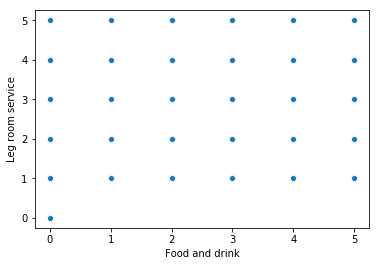

In [28]:
## Try to depict scatter plot, ...
sns.scatterplot(df['Food and drink'], df['Leg room service']) ## variant is too small ..:(

In [29]:
#sns.jointplot(df['Food and drink'], df['Leg room service'], kind="kde")

In [30]:
## Calculate correlational coefficient
np.corrcoef(df['Food and drink'], df['Leg room service'])[1,0]

0.0741605295597897

In [31]:
def depict_corr_matrix(col1, col2):
    ## Calculate & print correlation coefficient
    corr = np.corrcoef(df[col1], df[col2])[1,0]
    print('Correlational coefficient is {}'.format(corr))
    ## Depict joint plot
    sns.jointplot(df[col1], df[col2], kind="kde")

In [32]:
## In summary, ...
#depict_corr_matrix('Food and drink', 'Leg room service')

In [33]:
## Try another combination
#depict_corr_matrix('Inflight wifi service', 'Inflight entertainment')

In [34]:
## Try another combination
#depict_corr_matrix('Food and drink', 'Seat comfort')

## 3.0 Machine Learning

In this chapter, we consider statistical model, which predict passengers' satisfaction with other variables.

- Goal of this chapter
  - Select some given variables and confirm which variable impacts the satisfaction as a whole.
    - Decision Tree Classifier
    - Logistic Classifier

- Notes:
  - In order to move forward, we put `target` as target variable: 1: `satisfied`, 0: `neutral or dissatisfied`
  - In next chapter, we pursuit the predictivity with deep-learning technique and compare the accuracy with logistic classifier.

## 3.1 Decision Tree classifier

In [35]:
col_ml= ['Flight Distance'
        ,'Seat comfort'
        ,'Food and drink'
        ,'Inflight wifi service'
        ,'Inflight entertainment'
        ,'Online support'
        ,'Ease of Online booking'
        ,'Departure Delay in Minutes']

In [36]:
## Define decision tree model
clf = DecisionTreeClassifier(random_state=0, max_depth=4)

In [37]:
## Split the whole data into train & test
Obs_for_train = 120000
X_train = df[col_ml][:Obs_for_train]
y_train = df['target'][:Obs_for_train]
X_test = df[col_ml][Obs_for_train:]
y_test = df['target'][Obs_for_train:]

In [38]:
## Optimize parameters of the model
dt = clf.fit(X_train, y_train)

In [39]:
## Calculate accuracy
accuracy_dt = dt.score(X_test, y_test)
print(accuracy_dt)

0.9468623481781376


In [40]:
## Check feature importance for eadh variable
dt.feature_importances_

array([0.00747254, 0.25259443, 0.00293483, 0.        , 0.64863716,
       0.0176216 , 0.06889417, 0.00184526])

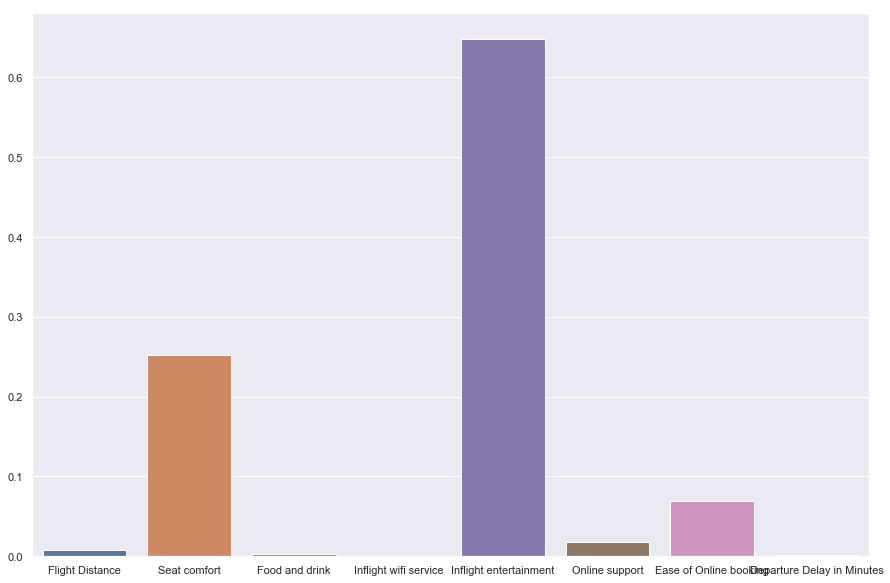

In [41]:
sns.set()
plt.figure(figsize=(15,10))
sns.barplot(col_ml, dt.feature_importances_)

In [42]:
## F1 score
f1_score(y_test, dt.predict(X_test))

0.972244250594766

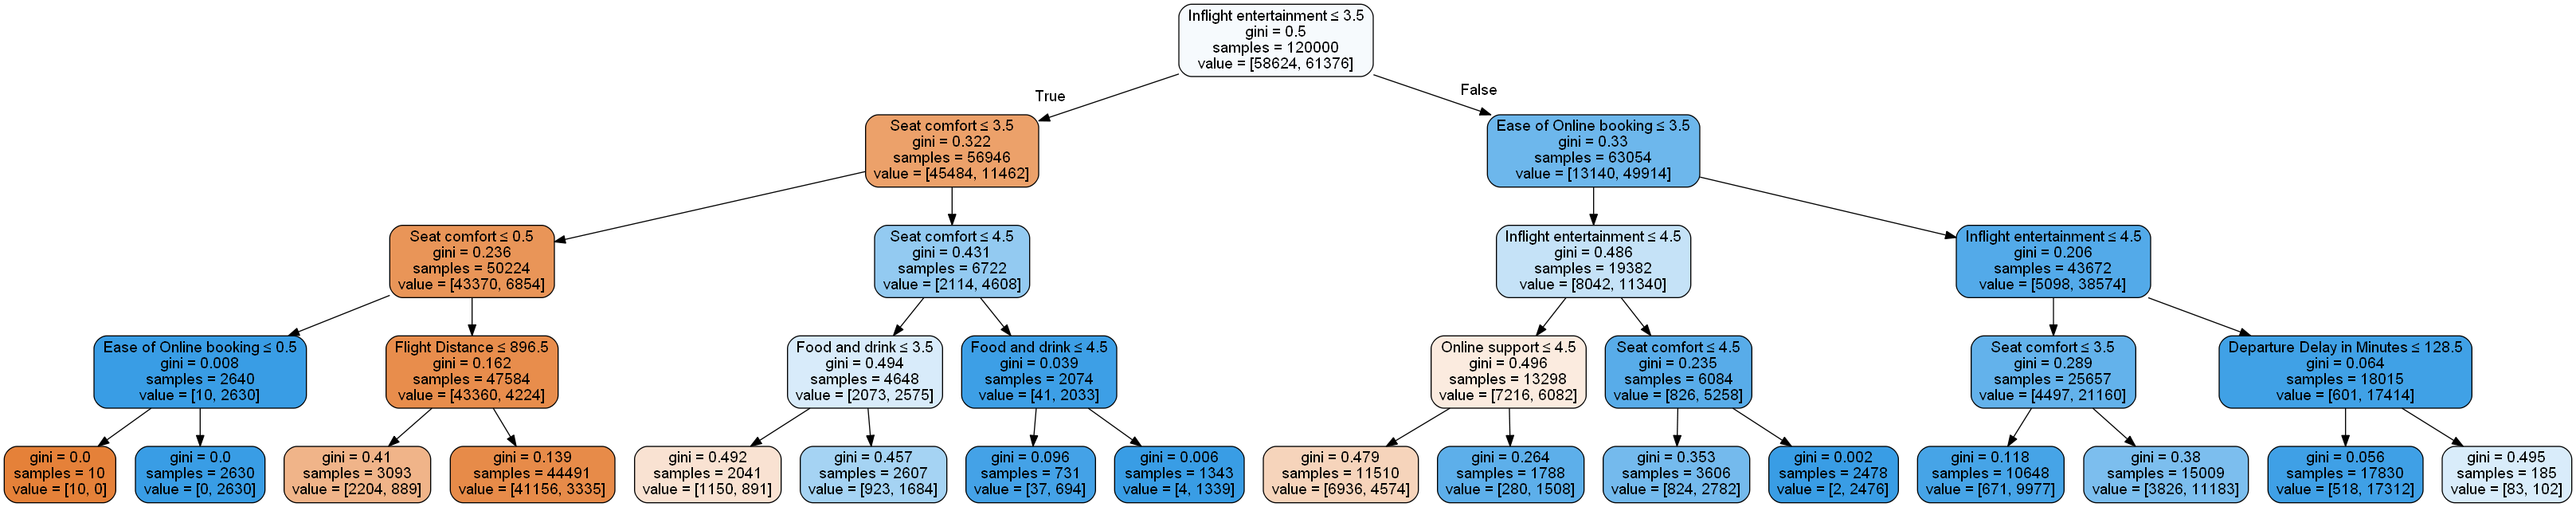

In [43]:
## Depict tree
dot_data = StringIO()
tree.export_graphviz(dt 
                     ,out_file=dot_data
                     ,feature_names=col_ml
                     ,filled=True
                     ,rounded=True
                     ,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Logistic regression

In [44]:
## Define logistic regression
clf_log = LogisticRegression(random_state=0, solver='lbfgs', max_iter=100)

In [45]:
## Optimize parameters of the model
clf_log.fit(X_train, y_train)

c:\users\kyiwasak.fareast\appdata\local\continuum\anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
## Calculate accuracies
accuracy_lr = clf_log.score(X_test, y_test)
print(accuracy_lr)

0.9351214574898785


In [47]:
## Each partial regression coefficient
clf_log.coef_

array([[-3.64512834e-04,  2.02228643e-01, -5.05070868e-01,
        -4.53663304e-01,  7.62986866e-01, -1.42807036e-01,
         6.96814559e-01, -6.32465826e-03]])

Text(0.5, 1.0, 'Partial regression coefficient on logistic regression')

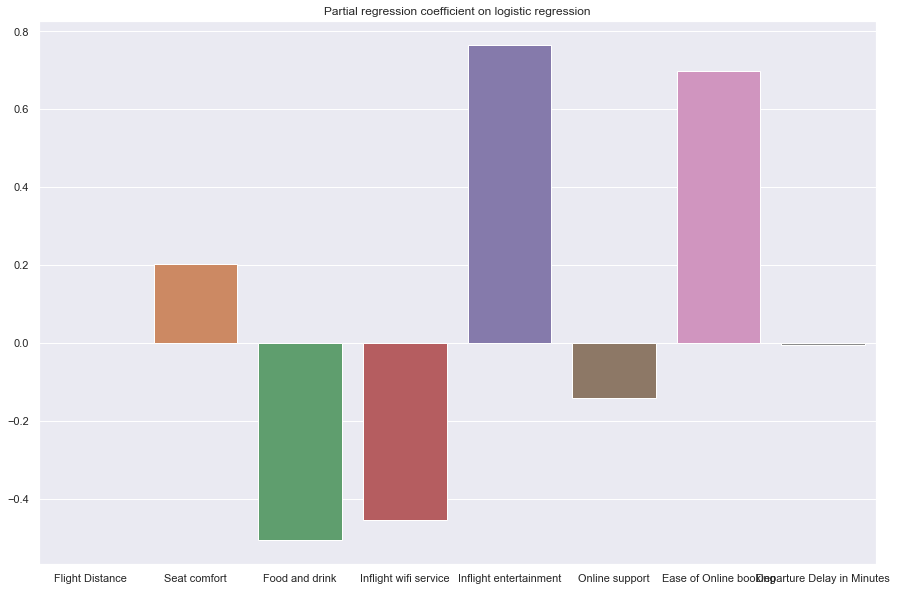

In [48]:
## Compare partial regression coefficients
sns.set()
plt.figure(figsize=(15,10))
sns.barplot(col_ml, clf_log.coef_[0])
plt.title('Partial regression coefficient on logistic regression')

In [49]:
## Confusiton matrix
confusion_matrix(y_test, clf_log.predict(X_test))

array([[ 130,   39],
       [ 602, 9109]], dtype=int64)

In [50]:
## F1 score
f1_score(y_test, clf_log.predict(X_test))

0.9660109231666578

## 3.3 Deep Learning

- In this chapter, we'd like to pursuit predictive accuracy with deep-learning technique, especially MLP(=Multi-Layer Perceptron). Please treat this content as introduction for deep-learning.

### 3.3.1 Equivalent to logistic regression

In [51]:
model1 = Sequential()
model1.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

model1.compile(loss='binary_crossentropy'
             ,optimizer='adam'
             ,metrics=['accuracy'])

In [52]:
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=1001, verbose=1, shuffle=False)

Epoch 1/100
120000/120000 [==============================] - 1s 4us/step - loss: 7.7864 - acc: 0.5114
Epoch 2/100
120000/120000 [==============================] - 0s 2us/step - loss: 7.7860 - acc: 0.5113
Epoch 3/100
120000/120000 [==============================] - 0s 2us/step - loss: 7.7844 - acc: 0.5113
Epoch 4/100
120000/120000 [==============================] - 0s 2us/step - loss: 7.7779 - acc: 0.5109A: 0s - loss: 9.7968 - acc: 0.3
Epoch 5/100
120000/120000 [==============================] - 0s 2us/step - loss: 7.7615 - acc: 0.5052
Epoch 6/100
120000/120000 [==============================] - 0s 2us/step - loss: 9.1700 - acc: 0.3876
Epoch 7/100
120000/120000 [==============================] - 0s 2us/step - loss: 7.5951 - acc: 0.5051
Epoch 8/100
120000/120000 [==============================] - 0s 2us/step - loss: 7.4861 - acc: 0.4652
Epoch 9/100
120000/120000 [==============================] - 0s 2us/step - loss: 4.7411 - acc: 0.5736
Epoch 10/100
120000/120000 [=======================

120000/120000 [==============================] - 0s 2us/step - loss: 1.0314 - acc: 0.6920
Epoch 80/100
120000/120000 [==============================] - 0s 2us/step - loss: 1.0283 - acc: 0.6926
Epoch 81/100
120000/120000 [==============================] - 0s 2us/step - loss: 1.0248 - acc: 0.6931
Epoch 82/100
120000/120000 [==============================] - 0s 2us/step - loss: 1.0219 - acc: 0.6939
Epoch 83/100
120000/120000 [==============================] - 0s 2us/step - loss: 1.0187 - acc: 0.6946
Epoch 84/100
120000/120000 [==============================] - 0s 2us/step - loss: 1.0157 - acc: 0.6954
Epoch 85/100
120000/120000 [==============================] - 0s 2us/step - loss: 1.0127 - acc: 0.6961
Epoch 86/100
120000/120000 [==============================] - 0s 2us/step - loss: 1.0096 - acc: 0.6967
Epoch 87/100
120000/120000 [==============================] - 0s 2us/step - loss: 1.0062 - acc: 0.6976
Epoch 88/100
120000/120000 [==============================] - 0s 2us/step - loss: 1.00

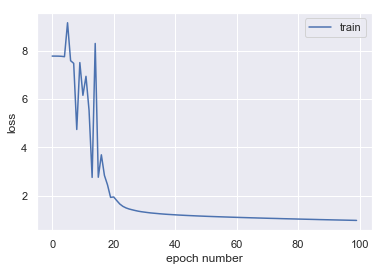

In [53]:
plt.plot(history1.history['loss'], label='train')
plt.legend()
plt.xlabel('epoch number')
plt.ylabel('loss')
plt.show()

In [54]:
loss1, accuracy_dl1 = model1.evaluate(X_test, y_test)
print('loss: {}, accuracy: {}'.format(loss1, accuracy_dl1))

9880/9880 [==============================] - 0s 20us/step
loss: 0.0935752833761682, accuracy: 0.9821862348178138


In [55]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


### 3.3.2 MLP -- Adding layers

In [56]:
model2 = Sequential()
model2.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(5, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy'
             ,optimizer='adam'
             ,metrics=['accuracy'])

In [57]:
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=1000, verbose=1, shuffle=False)

Epoch 1/100
120000/120000 [==============================] - 1s 5us/step - loss: 8.3684 - acc: 0.4367
Epoch 2/100
120000/120000 [==============================] - 0s 2us/step - loss: 5.1504 - acc: 0.5384
Epoch 3/100
120000/120000 [==============================] - 0s 2us/step - loss: 7.6255 - acc: 0.5115
Epoch 4/100
120000/120000 [==============================] - 0s 3us/step - loss: 7.2951 - acc: 0.4941
Epoch 5/100
120000/120000 [==============================] - 0s 3us/step - loss: 5.6058 - acc: 0.4732
Epoch 6/100
120000/120000 [==============================] - 0s 2us/step - loss: 7.3975 - acc: 0.5084
Epoch 7/100
120000/120000 [==============================] - 0s 2us/step - loss: 4.2396 - acc: 0.5587
Epoch 8/100
120000/120000 [==============================] - 0s 2us/step - loss: 7.5964 - acc: 0.5115
Epoch 9/100
120000/120000 [==============================] - 0s 2us/step - loss: 7.2905 - acc: 0.4915
Epoch 10/100
120000/120000 [==============================] - 0s 2us/step - loss: 

120000/120000 [==============================] - 0s 4us/step - loss: 0.7592 - acc: 0.6963
Epoch 81/100
120000/120000 [==============================] - 0s 2us/step - loss: 0.7547 - acc: 0.6958
Epoch 82/100
120000/120000 [==============================] - 0s 2us/step - loss: 0.7505 - acc: 0.6955
Epoch 83/100
120000/120000 [==============================] - 0s 2us/step - loss: 0.7463 - acc: 0.6951
Epoch 84/100
120000/120000 [==============================] - 0s 2us/step - loss: 0.7424 - acc: 0.6946
Epoch 85/100
120000/120000 [==============================] - 0s 2us/step - loss: 0.7386 - acc: 0.6936
Epoch 86/100
120000/120000 [==============================] - 0s 2us/step - loss: 0.7349 - acc: 0.6928
Epoch 87/100
120000/120000 [==============================] - 0s 2us/step - loss: 0.7315 - acc: 0.6921
Epoch 88/100
120000/120000 [==============================] - 0s 3us/step - loss: 0.7282 - acc: 0.6912
Epoch 89/100
120000/120000 [==============================] - 0s 2us/step - loss: 0.72

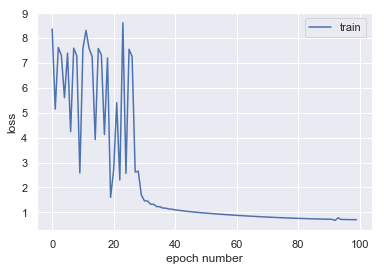

In [58]:
plt.plot(history2.history['loss'], label='train')
plt.legend()
plt.xlabel('epoch number')
plt.ylabel('loss')
plt.show()

In [59]:
loss2, accuracy_dl2 = model2.evaluate(X_test, y_test)
print('loss: {}, accuracy: {}'.format(loss2, accuracy_dl2))

9880/9880 [==============================] - 0s 21us/step
loss: 0.12012985220804871, accuracy: 0.9654858299595142


In [60]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


## 3.4 Compare accuracies for all models

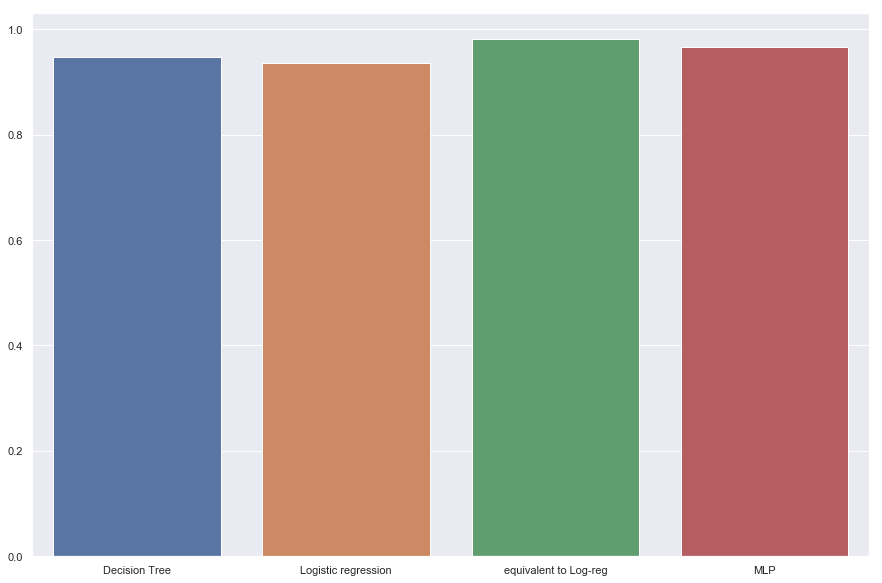

In [61]:
model_name = ['Decision Tree', 'Logistic regression', 'equivalent to Log-reg', 'MLP']
sns.set()
plt.figure(figsize=(15,10))
sns.barplot(model_name, [accuracy_dt, accuracy_lr, accuracy_dl1, accuracy_dl2])